In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
import missingno as msno

wine = load_wine()

In [32]:

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [33]:
# В Pandas я создаю фрейм данных для более упорядоченного отображения данных и проверяю соответствие предоставленному описанию:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [34]:
#проверяем процентное представительство классов
df.label.value_counts(normalize=True).round(3)

label
1    0.399
0    0.331
2    0.270
Name: proportion, dtype: float64

In [35]:
# Проверка на null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [36]:
# Копирую нужные мне столбцы
y = df["label"].copy()
X = df.iloc[:, :-1].copy()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=0)


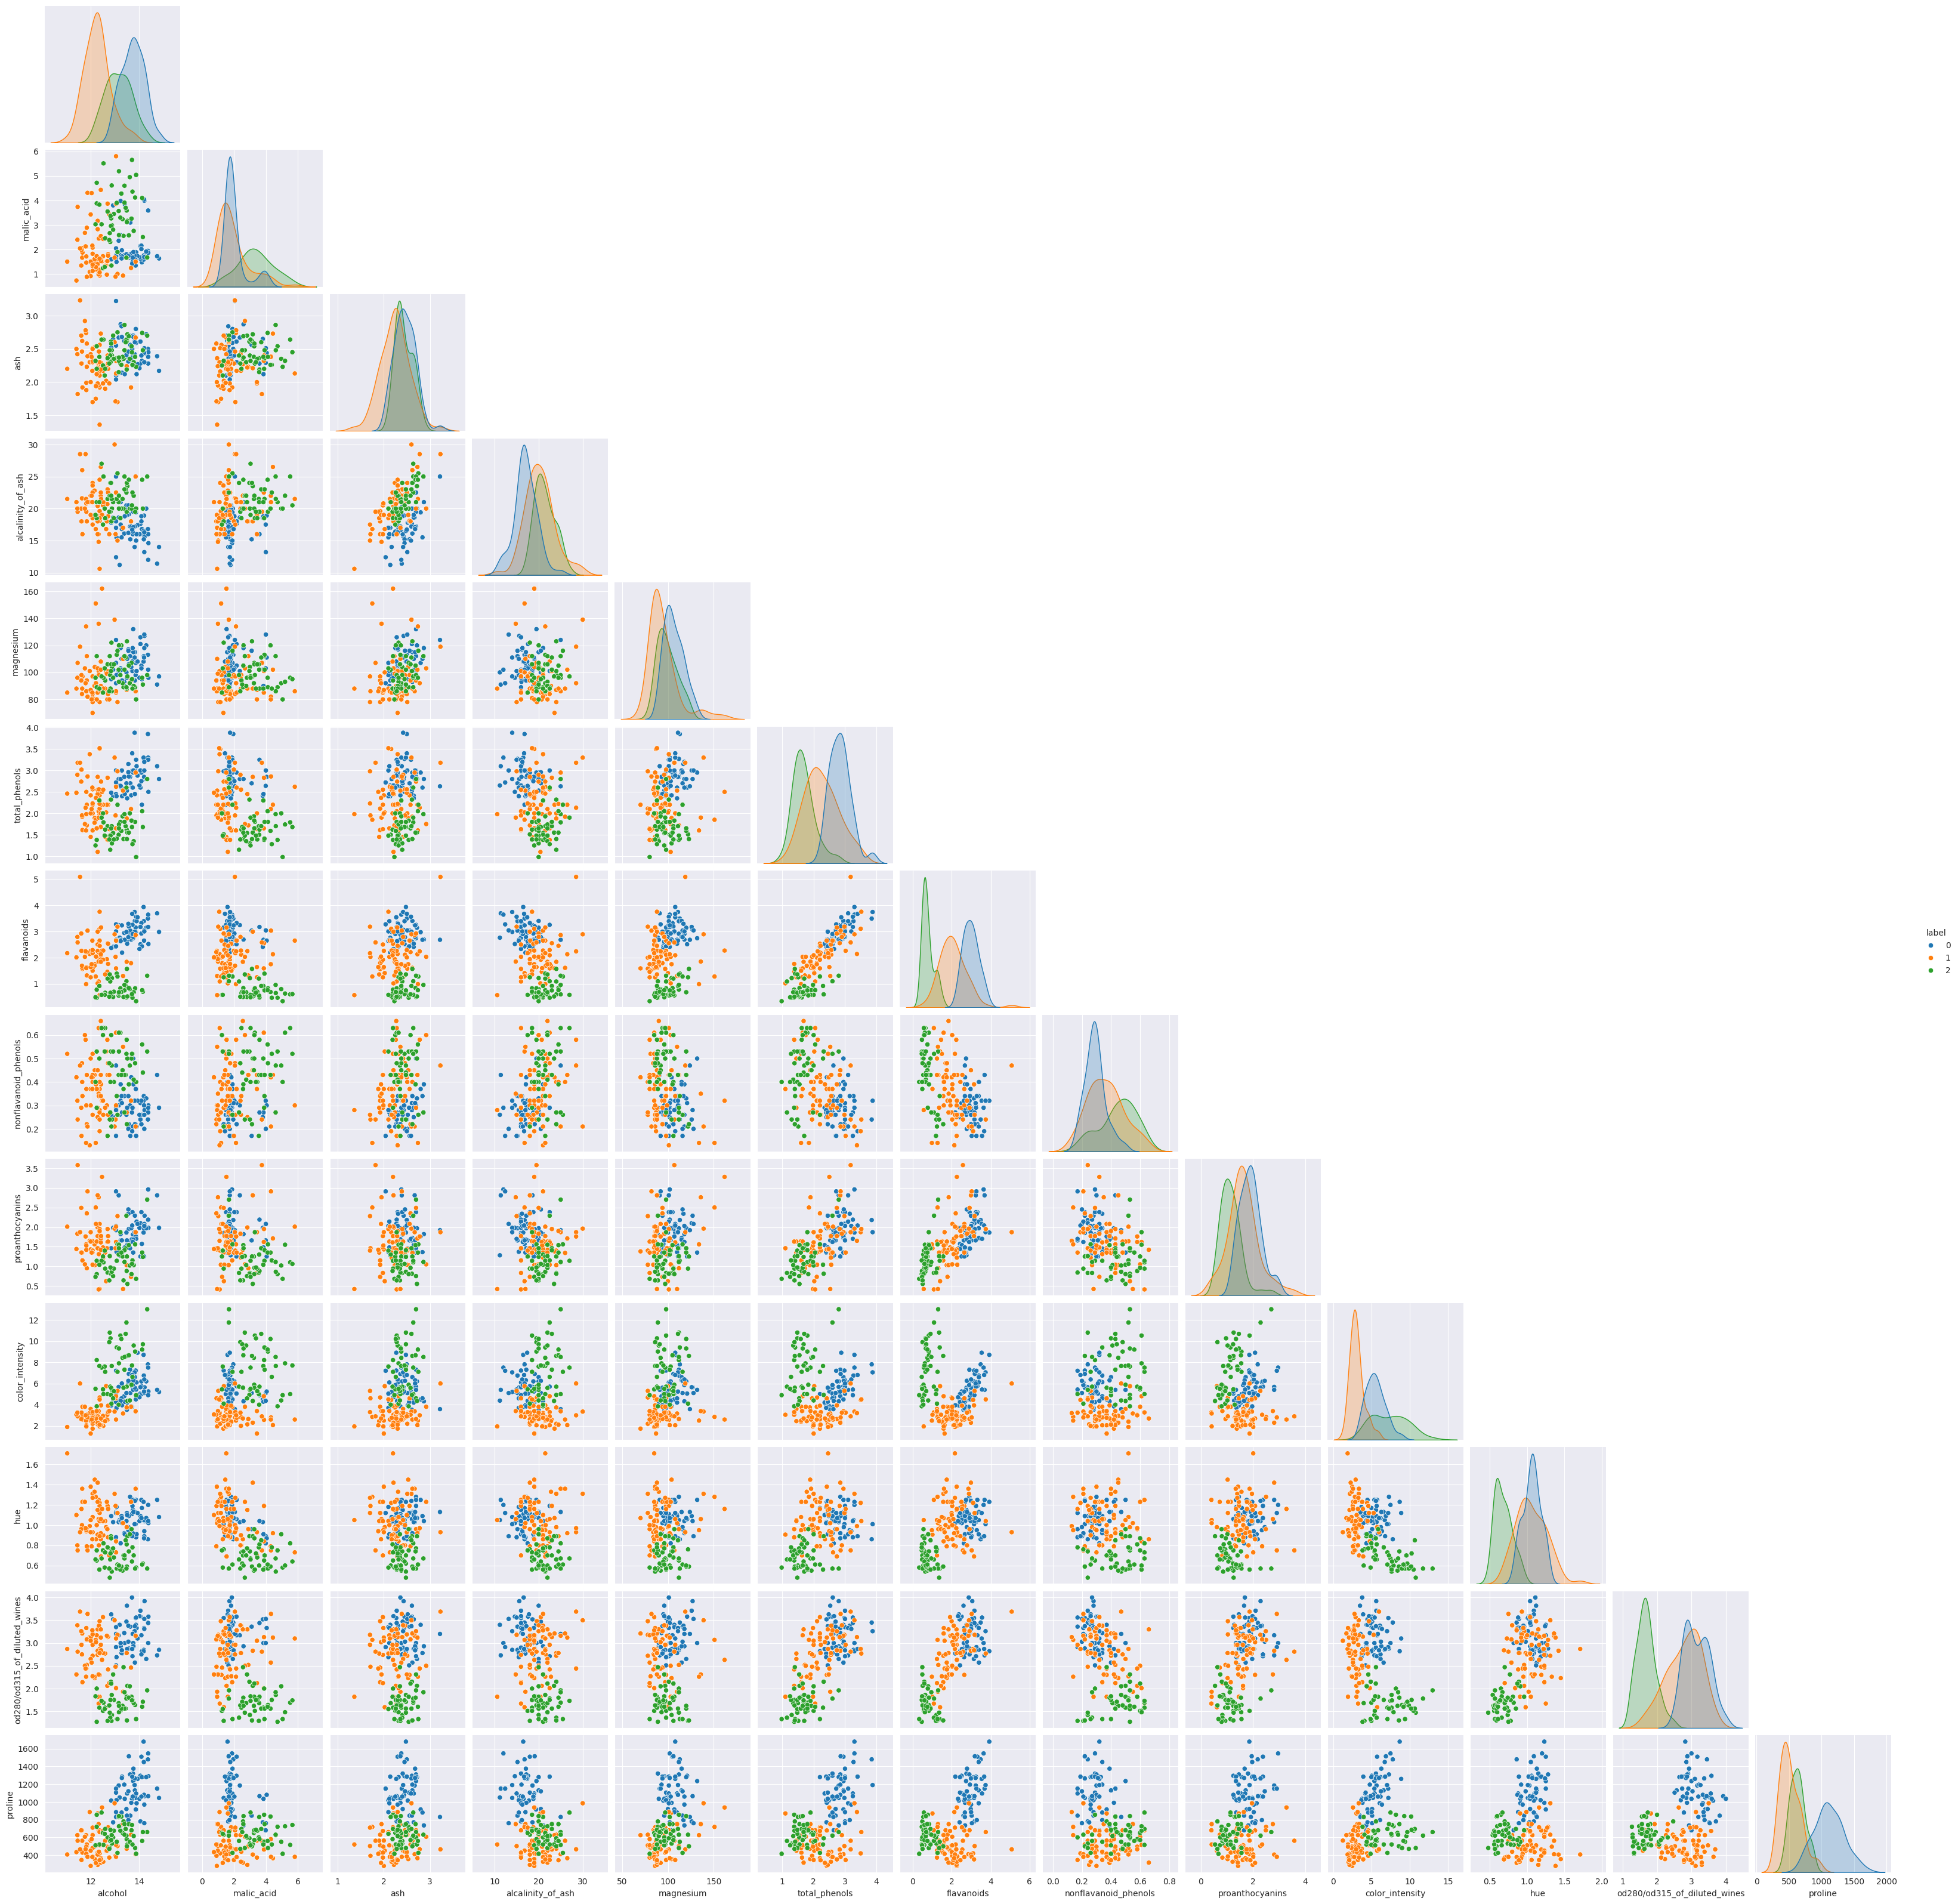

In [37]:
# для визуального исследования данных
sns.pairplot(df,
             hue='label',
             palette="tab10",
             corner=True)

plt.show()

In [38]:
# Проверка нужна ли масштабируемости
df.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00


In [39]:
# Стабилизирую данные
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Указываю соседей
best = 0
c = 0
for i in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    n = np.mean(y_pred == y_test)
    if n > best:
        best = n
        c = i
print(best, c)

0.9777777777777777 3


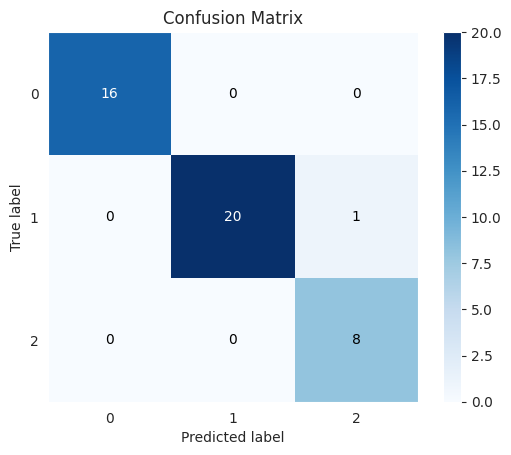

In [41]:
# Этот код строит матрицу неточностей или матрицу ошибок (confusion matrix) для результатов классификации.
knn = KNeighborsClassifier(n_neighbors=c)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

<h2>
В этом коде используется датасет вин California wines из sklearn для построения и исследования модели K Nearest Neighbors.

Сначала данные загружаются в Pandas DataFrame для удобства работы. Изучается описание, проверяется отсутствие пропущенных значений, распределение классов.

Далее данные разбиваются на обучающую и тестовую выборки. Строится парный график зависимостей признаков (pairplot).

Проверяется необходимость масштабирования данных, после чего признаки масштабируются при помощи MinMaxScaler.

Затем запускается цикл перебора количества соседей для модели KNN от 2 до 10. Для каждого варианта строится модель, оценивается качество на тестовой выборке. Лучшее значение запоминается.

В конце строится матрица ошибок для лучшей модели и выводится лучшее количество соседей.

Таким образом, в работе подбираются гиперпараметры и исследуется качество модели KNN на датасете вин.
<h2>